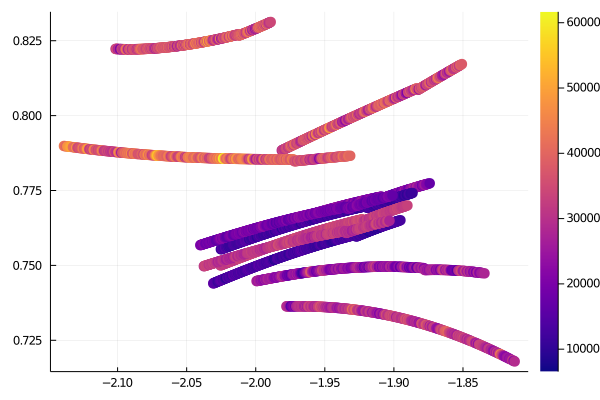

In [6]:
using CSV
using DataFrames
using Plots
df = DataFrame(CSV.File("IF_Output.csv"))

a_min = -5e13
a_max = 5e13

# df = df[(df[:,:A] .< a_max),:]
# df = df[(df[:,:A] .> a_min),:]

times = unique(df[!,:time])

# data = df[!,:A]
# histogram(data)

x = scatter();
for t in times
    sats = df[(df[:,:time] .== t),:]
    lat = sats[!,:lat_bot]
    long = sats[!,:long_bot]
    A = sats[!,:A]
    #A_norm = (A_norm .- a_min)/(a_max-a_min)
    scatter!(x, long, lat, zcolor = A, c = :plasma, markersize = 6, markerstrokewidth=0, legend = false)
end

x

┌ Info: Saved animation to 
│   fn = C:\Users\timv\Documents\School\AA272\Final Project\AA272-Project\tmp.gif
└ @ Plots C:\Users\timv\.julia\packages\Plots\6EMd6\src\animation.jl:104


19.210246 seconds (96.17 M allocations: 3.266 GiB, 3.57% gc time)


Plots.AnimatedGif("C:\\Users\\timv\\Documents\\School\\AA272\\Final Project\\AA272-Project\\tmp.gif")
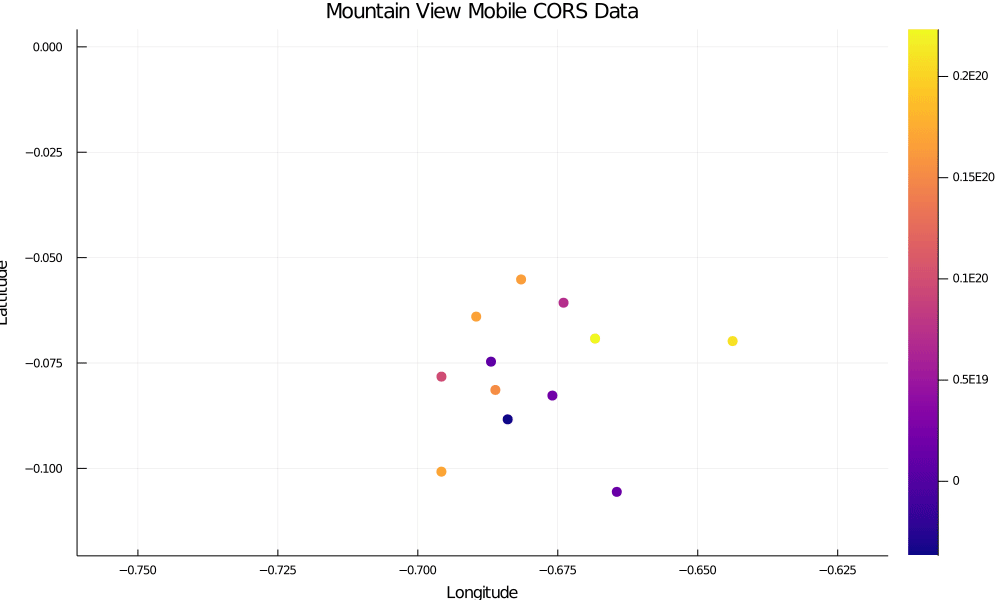

In [1]:
using CSV
using DataFrames
using Plots
using ProgressMeter;
df = DataFrame(CSV.File("MV_Phone.csv"))

a_min = -5e13
a_max = 5e13

times = unique(df[!,:time])

ymin = minimum(df[!,:lat_bot])
ymax = maximum(df[!,:lat_bot])
xmin = minimum(df[!,:long_bot])
xmax = maximum(df[!,:long_bot])

x = scatter(1, xlim = (xmin,xmax), ylim = (ymin, ymax), size = (1000, 600), xlabel="Longitude",ylabel="Lattitude",title="Mountain View Mobile CORS Data");

@time @gif for t in times
    sats = df[(df[:,:time] .== t),:]
    lat = sats[!,:lat_bot]
    long = sats[!,:long_bot]
    A = sats[!,:A]
    scatter!(x, long, lat, zcolor = A, c = :plasma, markersize = 6, markerstrokewidth=0, legend = false)
end every 10